In [1]:
import spacy

!spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 25.1 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [2]:
spacy.load('en_core_web_sm')

In [2]:
import os

from spacy import displacy

import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

import plotly.express as px

In [3]:
texts = []
file_names = []

for _file_name in os.listdir('laufey_lyrics'):
    if _file_name.endswith('.txt'):
        texts.append(open('laufey_lyrics' + '/' + _file_name, 'r', encoding='utf-8').read())
        file_names.append(_file_name)

In [4]:
d = {'Filename':file_names,'Text':texts}

In [17]:
laufey_df = pd.DataFrame(d)

In [18]:
laufey_df.head()

,Filename,Text
0,Goddess.txt,It always goes like this\nCould've predicted i...
1,I Wish You Love.txt,I wish you bluebirds in the spring\nTo give yo...
2,Best friend.txt,It's come to my attention\nThat I don't show e...
3,LIke The Movies.txt,"Maybe one day, I'll fall in a bookstore\nInto ..."
4,Bewitched.txt,Wrapped me in your arms\nLeaned in and whisper...


In [19]:
laufey_df['Text'] = laufey_df['Text'].str.replace('\s+', ' ', regex=True).str.strip()
laufey_df.head()

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/var/folders/l8/r7pghqld70117g6hmhn2bx980000gn/T/ipykernel_79937/108312207.py:2: SyntaxWarning: invalid escape sequence '\s'
  laufey_df['Text'] = laufey_df['Text'].str.replace('\s+', ' ', regex=True).str.strip()


,Filename,Text
0,Goddess.txt,It always goes like this Could've predicted it...
1,I Wish You Love.txt,I wish you bluebirds in the spring To give you...
2,Best friend.txt,It's come to my attention That I don't show en...
3,LIke The Movies.txt,"Maybe one day, I'll fall in a bookstore Into t..."
4,Bewitched.txt,Wrapped me in your arms Leaned in and whispere...


In [20]:
laufey_df['Filename'] = laufey_df['Filename'].str.replace('.txt', '', regex=True)

In [21]:
laufey_df.head()

,Filename,Text
0,Goddess,It always goes like this Could've predicted it...
1,I Wish You Love,I wish you bluebirds in the spring To give you...
2,Best friend,It's come to my attention That I don't show en...
3,LIke The Movies,"Maybe one day, I'll fall in a bookstore Into t..."
4,Bewitched,Wrapped me in your arms Leaned in and whispere...


In [22]:
metadata_df = pd.read_csv('laufeymetadata.csv')
metadata_df.head()

,ID,TITLE,ALBUM,RELEASE DATE,LYRICS
0,1,Beautiful Stranger,Everything I Know About Love,2022-08-16,"Beautiful stranger, sitting right there\nLooke..."
1,2,Best Friend,Typical of Me,2021-04-30,It's come to my attention\nThat I don't show e...
2,3,Bewitched,Bewitched,2023-09-08,Wrapped me in your arms\nLeaned in and whisper...
3,4,Bored,Bewitched: The Goddess Edition,2024-04-26,Why don't we\nCall it for what it is?\nCan't r...
4,5,Falling Behind,Everything I Know About Love,2022-08-26,Moved out to a new city\nJune is dawning down ...


In [23]:
metadata_df.rename(columns={"TITLE": "Filename"}, inplace=True)

In [24]:
metadata_df.head()

,ID,Filename,ALBUM,RELEASE DATE,LYRICS
0,1,Beautiful Stranger,Everything I Know About Love,2022-08-16,"Beautiful stranger, sitting right there\nLooke..."
1,2,Best Friend,Typical of Me,2021-04-30,It's come to my attention\nThat I don't show e...
2,3,Bewitched,Bewitched,2023-09-08,Wrapped me in your arms\nLeaned in and whisper...
3,4,Bored,Bewitched: The Goddess Edition,2024-04-26,Why don't we\nCall it for what it is?\nCan't r...
4,5,Falling Behind,Everything I Know About Love,2022-08-26,Moved out to a new city\nJune is dawning down ...


In [25]:
laufey_meta_df = metadata_df.merge(laufey_df, on='Filename')

In [26]:
laufey_meta_df.head()

,ID,Filename,ALBUM,RELEASE DATE,LYRICS,Text
0,1,Beautiful Stranger,Everything I Know About Love,2022-08-16,"Beautiful stranger, sitting right there\nLooke...","Beautiful stranger, sitting right there Looked..."
1,3,Bewitched,Bewitched,2023-09-08,Wrapped me in your arms\nLeaned in and whisper...,Wrapped me in your arms Leaned in and whispere...
2,4,Bored,Bewitched: The Goddess Edition,2024-04-26,Why don't we\nCall it for what it is?\nCan't r...,Why don't we Call it for what it is? Can't rem...
3,5,Falling Behind,Everything I Know About Love,2022-08-26,Moved out to a new city\nJune is dawning down ...,Moved out to a new city June is dawning down o...
4,6,Fragile,Everything I Know About Love,2022-08-26,Will you let me come closer to you?\nI know th...,Will you let me come closer to you? I know tha...


In [27]:
nlp = spacy.load('en_core_web_sm')

print(nlp.pipe_names)

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


In [28]:
sentence = "This is 'an' example? sentence"

doc = nlp(sentence)

In [29]:
for token in doc:
    print(token.text, token.pos_)

This PRON
is AUX
' PUNCT
an DET
' PUNCT
example NOUN
? PUNCT
sentence NOUN


In [30]:
def process_text(text):
    return nlp(text)

In [32]:
laufey_meta_df['Doc'] = laufey_meta_df['Text'].apply(process_text)

In [33]:
def get_token(doc):
    return [(token.text) for token in doc]

In [34]:
laufey_meta_df['Tokens'] = laufey_meta_df['Doc'].apply(get_token)
laufey_meta_df.head()

,ID,Filename,ALBUM,RELEASE DATE,LYRICS,Text,Doc,Tokens
0,1,Beautiful Stranger,Everything I Know About Love,2022-08-16,"Beautiful stranger, sitting right there\nLooke...","Beautiful stranger, sitting right there Looked...","(Beautiful, stranger, ,, sitting, right, there...","[Beautiful, stranger, ,, sitting, right, there..."
1,3,Bewitched,Bewitched,2023-09-08,Wrapped me in your arms\nLeaned in and whisper...,Wrapped me in your arms Leaned in and whispere...,"(Wrapped, me, in, your, arms, Leaned, in, and,...","[Wrapped, me, in, your, arms, Leaned, in, and,..."
2,4,Bored,Bewitched: The Goddess Edition,2024-04-26,Why don't we\nCall it for what it is?\nCan't r...,Why don't we Call it for what it is? Can't rem...,"(Why, do, n't, we, Call, it, for, what, it, is...","[Why, do, n't, we, Call, it, for, what, it, is..."
3,5,Falling Behind,Everything I Know About Love,2022-08-26,Moved out to a new city\nJune is dawning down ...,Moved out to a new city June is dawning down o...,"(Moved, out, to, a, new, city, June, is, dawni...","[Moved, out, to, a, new, city, June, is, dawni..."
4,6,Fragile,Everything I Know About Love,2022-08-26,Will you let me come closer to you?\nI know th...,Will you let me come closer to you? I know tha...,"(Will, you, let, me, come, closer, to, you, ?,...","[Will, you, let, me, come, closer, to, you, ?,..."


In [35]:
tokens = laufey_meta_df[['Text', 'Tokens']].copy()
tokens.head()

,Text,Tokens
0,"Beautiful stranger, sitting right there Looked...","[Beautiful, stranger, ,, sitting, right, there..."
1,Wrapped me in your arms Leaned in and whispere...,"[Wrapped, me, in, your, arms, Leaned, in, and,..."
2,Why don't we Call it for what it is? Can't rem...,"[Why, do, n't, we, Call, it, for, what, it, is..."
3,Moved out to a new city June is dawning down o...,"[Moved, out, to, a, new, city, June, is, dawni..."
4,Will you let me come closer to you? I know tha...,"[Will, you, let, me, come, closer, to, you, ?,..."


In [37]:
def get_lemma(doc):
    return [(token.lemma_) for token in doc]
laufey_meta_df['Lemmas'] = laufey_meta_df['Doc'].apply(get_lemma)

In [38]:
print(f'"Love" appears in the text tokens column ' + str(laufey_meta_df['Tokens'].apply(lambda x: x.count('write')).sum()) + ' times.')
print(f'"Love" appears in the lemmas column ' + str(laufey_meta_df['Lemmas'].apply(lambda x: x.count('write')).sum()) + ' times.')

"Love" appears in the text tokens column 0 times.
"Love" appears in the lemmas column 2 times.


In [40]:
def get_pos(doc):
    return [(token.pos_, token.tag_) for token in doc]
    
laufey_meta_df['POS'] = laufey_meta_df['Doc'].apply(get_pos)

In [41]:
list(laufey_meta_df['POS'])

[[('ADJ', 'JJ'),
  ('NOUN', 'NN'),
  ('PUNCT', ','),
  ('VERB', 'VBG'),
  ('ADV', 'RB'),
  ('ADV', 'RB'),
  ('VERB', 'VBD'),
  ('ADP', 'RP'),
  ('ADP', 'IN'),
  ('PRON', 'PRP'),
  ('CCONJ', 'CC'),
  ('PRON', 'PRP$'),
  ('ADJ', 'JJ'),
  ('ADJ', 'JJ'),
  ('NOUN', 'NN'),
  ('VERB', 'VBD'),
  ('ADV', 'RB'),
  ('ADP', 'IN'),
  ('DET', 'DT'),
  ('NOUN', 'NN'),
  ('PUNCT', ','),
  ('AUX', 'VBD'),
  ('PART', 'RB'),
  ('VERB', 'VB'),
  ('PART', 'TO'),
  ('AUX', 'VB'),
  ('ADJ', 'JJ'),
  ('PRON', 'PRP'),
  ('VERB', 'VBP'),
  ('PART', 'TO'),
  ('VERB', 'VB'),
  ('ADP', 'IN'),
  ('NOUN', 'NN'),
  ('ADP', 'IN'),
  ('DET', 'DT'),
  ('NOUN', 'NN'),
  ('ADJ', 'JJ'),
  ('NOUN', 'NN'),
  ('PUNCT', ','),
  ('VERB', 'VBG'),
  ('ADV', 'RB'),
  ('ADV', 'RB'),
  ('VERB', 'VBG'),
  ('DET', 'DT'),
  ('NOUN', 'NN'),
  ('PUNCT', ','),
  ('VERB', 'VBD'),
  ('ADP', 'IN'),
  ('PRON', 'PRP$'),
  ('NOUN', 'NN'),
  ('PRON', 'PRP'),
  ('VERB', 'VBD'),
  ('SCONJ', 'IN'),
  ('PRON', 'PRP'),
  ('VERB', 'VBD'),
  ('CCONJ',

In [42]:
def extract_proper_nouns(doc):
    return [token.text for token in doc if token.pos_ == 'PROPN']
laufey_meta_df['Proper_Nouns'] = laufey_meta_df['Doc'].apply(extract_proper_nouns)

In [47]:
list(laufey_meta_df['Proper_Nouns'])

[['Ladbroke', 'Grove'],
 ['London', 'Bewitched', 'London', 'Bewitched'],
 ['Bored',
  'Bored',
  'Baby',
  'Bored',
  'Charming',
  'Bored',
  'Bored',
  'Baby',
  'Darling',
  'Bored',
  'Bored',
  'Baby'],
 ['June', 'Lovers', 'Ooh', 'Stepped', 'Bossa', 'nova', 'Hope'],
 ['Nerve', 'Ooh', 'ooh', 'Ooh', 'ooh', 'ooh', 'ooh', 'Ooh', 'ooh', 'Fragile'],
 ['blah',
  'Cupid',
  'Confess',
  'Unrequited',
  'Love',
  'Cupid',
  'Confess',
  'Confess'],
 ['Kissed', 'Guess', 'Reduced', 'Human', 'Aphrodite', 'Reduced', 'Human'],
 ['July', 'Love'],
 ['Magnolia',
  'Magnolia',
  'Magnolia',
  'Magnolia',
  'Ooh',
  'Magnolia',
  'abyss',
  'Magnolia',
  'Enchants',
  'Perfection',
  'Magnolia',
  'Magnolia',
  'Magnolia'],
 ['Melrose', 'Avenue'],
 ['Valentine', 'Got', 'Valentine']]

In [48]:
def extract_named_entities(doc):
    return [ent.label_ for ent in doc.ents]

laufey_meta_df['Named_Entities'] = laufey_meta_df['Doc'].apply(extract_named_entities)
laufey_meta_df['Named_Entities']

0                                  [ORDINAL, FAC, TIME]
1     [ORDINAL, GPE, ORDINAL, ORDINAL, GPE, ORDINAL,...
2          [PRODUCT, PERSON, ORDINAL, PRODUCT, PRODUCT]
3       [DATE, GPE, NORP, CARDINAL, CARDINAL, CARDINAL]
4               [PERSON, PERSON, DATE, DATE, TIME, ORG]
5              [DATE, ORG, ORG, WORK_OF_ART, DATE, ORG]
6                                      [PERSON, PERSON]
7                             [DATE, DATE, WORK_OF_ART]
8     [GPE, GPE, GPE, GPE, PERSON, PERSON, PERSON, O...
9                                [ORG, DATE, TIME, FAC]
10                      [DATE, PERSON, ORDINAL, PERSON]
Name: Named_Entities, dtype: object

In [49]:
def extract_named_entities(doc):
    return [ent for ent in doc.ents]

laufey_meta_df['NE_Words'] = laufey_meta_df['Doc'].apply(extract_named_entities)
laufey_meta_df['NE_Words']

0         [(second), (Ladbroke, Grove), (the, morning)]
1     [(first), (London), (second), (first), (London...
2         [(Baby), (Charming), (first), (Baby), (Baby)]
3     [(June), (Stepped), (Bossa), (One), (two), (th...
4     [(Grew), (Nerve), (a, year), (40, days), (that...
5     [(one, day), (Cupid), (Unrequited), (Love), (t...
6                                   [(Kissed), (Guess)]
7                       [(the, spring), (July), (Love)]
8     [(Magnolia), (Floats), (Magnolia), (Magnolia),...
9     [(Took), (sixteen, long, days), (last, night),...
10    [(years, and, years), (Valentine), (first), (V...
Name: NE_Words, dtype: object

In [79]:
doc = laufey_meta_df['Doc'][1]

displacy.render(doc, style='ent', jupyter=True)

In [80]:
laufey_meta_df.to_csv('laufey_lyrics_with_spaCy_tags.csv')

In [56]:
pos_analysis_df = laufey_meta_df[['Filename','LYRICS', 'Doc']]

num_list = []

def get_pos_tags(doc):
    dictionary = {}
    num_pos = doc.count_by(spacy.attrs.POS)
    for k,v in sorted(num_pos.items()):
        dictionary[doc.vocab[k].text] = v
    num_list.append(dictionary)

pos_analysis_df.loc['C_POS'] = pos_analysis_df['Doc'].apply(get_pos_tags)

In [57]:
pos_counts = pd.DataFrame(num_list)
columns = list(pos_counts.columns)

idx = 0
new_col = pos_analysis_df['LYRICS']
pos_counts.insert(loc=idx, column='LYRICS', value=new_col)

pos_counts

,LYRICS,ADJ,ADP,ADV,AUX,CCONJ,DET,NOUN,PART,PRON,PROPN,PUNCT,SCONJ,VERB,INTJ,NUM,X
0,"Beautiful stranger, sitting right there\nLooke...",15,13,16,18,6,16,37,8,34,2,10,6,40,NaN,NaN,NaN
1,Wrapped me in your arms\nLeaned in and whisper...,9,19,23,15,8,20,26,4,60,4,12,1,46,NaN,NaN,NaN
2,Why don't we\nCall it for what it is?\nCan't r...,23,19,20,34,14,12,29,14,49,12,43,7,38,4.0,NaN,NaN
3,Moved out to a new city\nJune is dawning down ...,11,20,7,17,7,13,26,11,29,7,7,3,26,1.0,3.0,NaN
4,Will you let me come closer to you?\nI know th...,9,17,16,23,6,13,30,5,44,10,28,6,35,11.0,1.0,NaN
5,Don't you notice how\nI get quiet when there's...,8,23,9,13,8,15,22,8,45,8,21,8,39,6.0,1.0,NaN
6,It always goes like this\nCould've predicted i...,8,18,15,19,4,9,20,8,50,7,3,11,31,4.0,1.0,NaN
7,I wish you bluebirds in the spring\nTo give yo...,15,12,7,4,11,9,22,5,42,2,12,5,31,NaN,NaN,NaN
8,"Magnolia, she could have anyone in the world\n...",7,19,5,19,3,10,22,4,32,13,7,5,22,1.0,NaN,NaN
9,I made a promise\nTo distance myself\nTook a f...,7,13,13,23,1,7,17,16,44,2,6,5,24,NaN,1.0,1.0


In [58]:
average_pos_df = pos_counts.groupby(['LYRICS']).mean()

average_pos_df = average_pos_df.round(0)

average_pos_df = average_pos_df.reset_index()

average_pos_df

,LYRICS,ADJ,ADP,ADV,AUX,CCONJ,DET,NOUN,PART,PRON,PROPN,PUNCT,SCONJ,VERB,INTJ,NUM,X
0,"Beautiful stranger, sitting right there\nLooke...",15.0,13.0,16.0,18.0,6.0,16.0,37.0,8.0,34.0,2.0,10.0,6.0,40.0,NaN,NaN,NaN
1,Don't you notice how\nI get quiet when there's...,8.0,23.0,9.0,13.0,8.0,15.0,22.0,8.0,45.0,8.0,21.0,8.0,39.0,6.0,1.0,NaN
2,I made a promise\nTo distance myself\nTook a f...,7.0,13.0,13.0,23.0,1.0,7.0,17.0,16.0,44.0,2.0,6.0,5.0,24.0,NaN,1.0,1.0
3,I wish you bluebirds in the spring\nTo give yo...,15.0,12.0,7.0,4.0,11.0,9.0,22.0,5.0,42.0,2.0,12.0,5.0,31.0,NaN,NaN,NaN
4,I've rejected affection\nFor years and years\n...,7.0,11.0,19.0,21.0,5.0,16.0,25.0,9.0,50.0,3.0,15.0,8.0,36.0,1.0,2.0,NaN
5,It always goes like this\nCould've predicted i...,8.0,18.0,15.0,19.0,4.0,9.0,20.0,8.0,50.0,7.0,3.0,11.0,31.0,4.0,1.0,NaN
6,"Magnolia, she could have anyone in the world\n...",7.0,19.0,5.0,19.0,3.0,10.0,22.0,4.0,32.0,13.0,7.0,5.0,22.0,1.0,NaN,NaN
7,Moved out to a new city\nJune is dawning down ...,11.0,20.0,7.0,17.0,7.0,13.0,26.0,11.0,29.0,7.0,7.0,3.0,26.0,1.0,3.0,NaN
8,Why don't we\nCall it for what it is?\nCan't r...,23.0,19.0,20.0,34.0,14.0,12.0,29.0,14.0,49.0,12.0,43.0,7.0,38.0,4.0,NaN,NaN
9,Will you let me come closer to you?\nI know th...,9.0,17.0,16.0,23.0,6.0,13.0,30.0,5.0,44.0,10.0,28.0,6.0,35.0,11.0,1.0,NaN


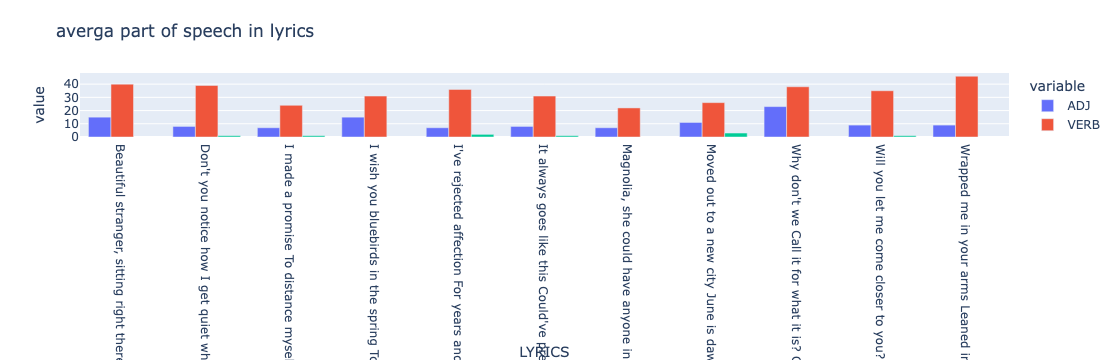

In [60]:
fig = px.bar(average_pos_df, x="LYRICS", y=["ADJ", 'VERB', "NUM"], title="averga part of speech in lyrics", barmode='group')
fig.show()

In [64]:
laufey_meta_df.to_csv('laufey_lyrics_with_spaCy_tags.csv')